In [2]:
#Qiskit Advocate Questions
#Questions related to Circuit Compilation
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
import numpy as np
import math
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *

# lib from Qiskit Aqua
from qiskit.transpiler import PassManager, CouplingMap
from qiskit.transpiler.passes import BasicSwap, LookaheadSwap
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import QuantumVolume
from qiskit.quantum_info import Operator, Pauli

# Loading your IBM Q account(s)
provider = IBMQ.load_account()
q_simulator = Aer.get_backend('qasm_simulator')
u_simulator = Aer.get_backend('unitary_simulator')
s_simulator = Aer.get_backend('statevector_simulator')

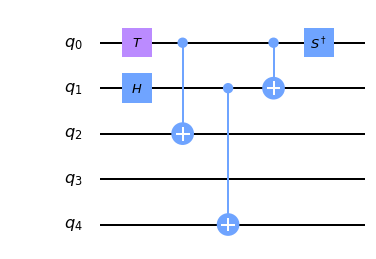

In [6]:
#0. How do you merge the lhs and rhs circuits to form the final circuit? 
# 1)  lhs.append(rhs)
# 2)  lhs.combine(rhs)
# 3)  lhs.compose(rhs)
# 4)  lhs+rhs
# 5)  None of the above

lhs = QuantumCircuit(5)
lhs.t(0)
lhs.h(1)
lhs.cx(0, 2)
lhs.cx(1, 4)

rhs = QuantumCircuit(2)
rhs.cx(0, 1)
rhs.sdg(0)

lhs=lhs.compose(rhs)
lhs.draw('mpl')

In [16]:
# What's the depth of QuantumVolume(num_qubits=5, depth=5) circuit after decomposition into basis gates [u3,cx]?            
#1)  5
#2)  10
#3)  25
#4)  35
#5)  None of the above

qc = QuantumVolume(num_qubits=5, depth=5)
qc1 = transpile(qc, basis_gates=['u3', 'cx'])
print(qc.depth(), qc1.depth())
#qc1.draw('mpl')

1 31


In [26]:
# Which one of the following Operators is different from the rest?
# 1)  Operator(Pauli(label='XZ'))
# 2)  Operator(Pauli(label='X')).tensor(Operator(Pauli(label='Z')))
# 3)  qc = QuantumCircuit(2)
#     qc.x(0)
#     qc.z(1)
#     Operator(qc)
# 4)  Operator([[0, 0, 1, 0], [0, 0, 0, -1], [1, 0, 0, 0], [0, -1, 0, 0]])
# 5)  None of the above

a = Operator(Pauli(label='XZ'))
print(a)
b = Operator(Pauli(label='X')).tensor(Operator(Pauli(label='Z')))
print(b)
qc = QuantumCircuit(2)
qc.x(0)
qc.z(1)
c=Operator(qc)
print(c)
d=Operator([[0, 0, 1, 0], [0, 0, 0, -1], [1, 0, 0, 0], [0, -1, 0, 0]])
print(d)

Operator([[ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
Operator([[ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j, -0.+0.j,  0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
Operator([[ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j],
          [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
Operator([[ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


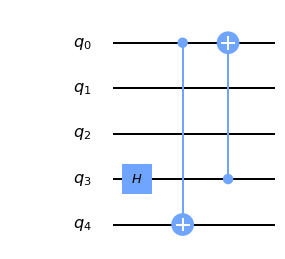

In [4]:
#1. How many gates are in the quantum circuit that results from 
#transpiling the following quantum circuit using only the pass 'BasicSwap?'
#Assume the following coupling map
#[[0, 1], [1, 2], [2, 3], [3, 4]]
tpl_circuit = QuantumCircuit(5)
tpl_circuit.h(3)
tpl_circuit.cx(0, 4)
tpl_circuit.cx(3, 0)
tpl_circuit.draw()
#6, 9, 12, 15, None of the above

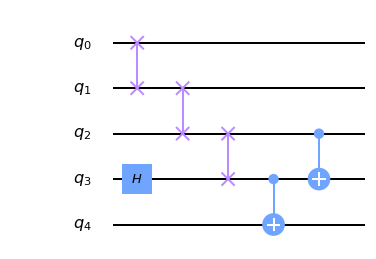

In [5]:
coupling = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]
coupling_map = CouplingMap(couplinglist=coupling)
pass_manager = PassManager()
pass_manager.append([BasicSwap(coupling_map=coupling_map)])
basic_circ = transpile(tpl_circuit, q_simulator, pass_manager=pass_manager)
basic_circ.draw(output="mpl")
#Answer 6

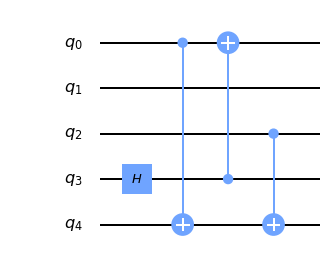

In [8]:
#1. How many gates are in the quantum circuit that results from 
#transpiling the following quantum circuit using only the pass 'LookaheadSwap?'
#Assume the following coupling map
#[[0, 1], [1, 2], [2, 3], [3, 4]]
qc = QuantumCircuit(5)
qc.h(3)
qc.cx(0, 4)
qc.cx(3, 0)
qc.cx(2,4)
qc.draw('mpl')
#6, 8, 9, 12, None of the above

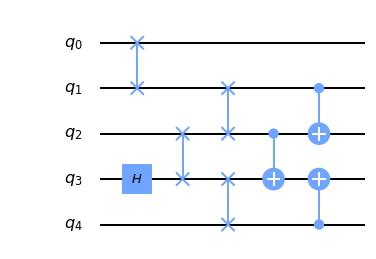

In [5]:
coupling = [[0, 1], [1, 2], [2, 3], [3, 4]]
coupling_map = CouplingMap(couplinglist=coupling)
ls = LookaheadSwap(coupling_map=coupling_map)
pass_manager = PassManager(ls)
lookahead_circ = pass_manager.run(qc)

lookahead_circ.draw(output="mpl")
#Answer 8

<ipython-input-10-00fc18de4db2>:10: DeprecationWarning: The parameter pass_manager in transpile is being deprecated. The preferred way to tranpile a circuit using a custom pass manager is pass_manager.run(circuit)
  basic_circ = transpile(qc, pass_manager=pass_manager)


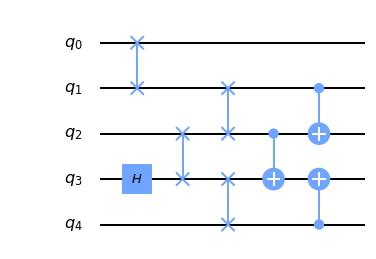

In [10]:
coupling = [[0, 1], [1, 2], [2, 3], [3, 4]]
coupling_map = CouplingMap(couplinglist=coupling)
ls = LookaheadSwap(coupling_map=coupling_map)
pass_manager = PassManager()
#lookahead_circ = pass_manager.run(qc)

#lookahead_circ.draw(output="mpl")
#Answer 8
pass_manager.append([ls])
basic_circ = transpile(qc, pass_manager=pass_manager)
basic_circ.draw(output="mpl")

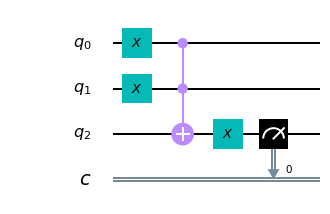

In [7]:
#2. Which of the following circuits implements an OR gate between two inputs A and B?
a=0
b=0
#Circuit 1:
qc1 = QuantumCircuit(3,1)
if a=='1':
    qc1.x(0)
if b=='1':
    qc1.x(1)
qc1.x(0)
qc1.x(1)
qc1.ccx(0,1,2)
qc1.x(2)
qc1.measure(2,0)

qc1.draw()

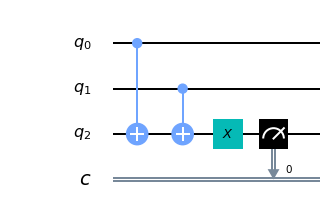

In [8]:
#Circuit 2: 
qc2 = QuantumCircuit(3,1)
if a=='1':
    qc2.x(0)
if b=='1':
    qc2.x(1)
qc2.cx(0,2)
qc2.cx(1,2)
qc2.x(2)
qc2.measure(2,0)
qc2.draw()

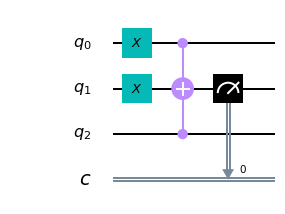

In [9]:
#Circuit 3:
qc3 = QuantumCircuit(3,1)
if a=='1':
    qc3.x(0)
if b=='1':
    qc3.x(1)
qc3.x(0)
qc3.x(1)
qc3.ccx(0,2,1)
qc3.measure(1,0)
qc3.draw()

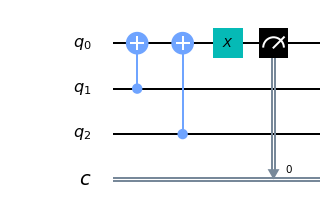

In [10]:
#Circuit 4:
qc4 = QuantumCircuit(3,1)
if a=='1':
    qc4.x(0)
if b=='1':
    qc4.x(1)
qc4.cx(1,0)
qc4.cx(2,0)
qc4.x(0)
qc4.measure(0,0)
qc4.draw()
#None of these circuits

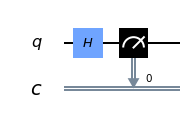

In [11]:
#Which of the 4 following circuits would give a totally random output 
#for both x and z measurements?
#Circuit 1:
qc = QuantumCircuit(1,1)
qc.h(0) 
qc.measure(0,0)
qc.draw()

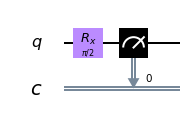

In [12]:
#Circuit 2:
qc = QuantumCircuit(1,1)
qc.rx(np.pi/2,0)
qc.measure(0,0)
qc.draw()

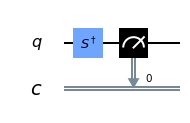

In [13]:
#Circuit 3:
qc = QuantumCircuit(1,1)
qc.sdg(0)
qc.measure(0,0)
qc.draw()

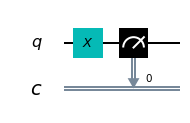

In [14]:
#Circuit 4:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.measure(0,0)
qc.draw()
#None of the above

In [15]:
#3. Which of the following will load a state with 75% of outputs being 0, and 25% being 1
ket = [np.sqrt(0.25),np.sqrt(0.75)]
ket = [np.sqrt(0.75),np.sqrt(0.25)]
ket = [0.25,0.75]
ket = [0.75,0.25]
#None of the above

In [16]:
#4. Using the correct answer for the previous question, 
#which of the following best describes the output of an x measurement of this state?
#72% 0 and 28% 1
#93% 0 and 7% 1
#14% 0 and 86% 1
#48% 0 and 52% 1
#None of the above

# 5. Create a two qubit circuit, with an H gate on both qubits, followed by an S gate on qubit 0. 
#Which of the following describes the final statevector?<br>
A. <img src="http://latex.codecogs.com/svg.latex?\frac{1}{\sqrt{2}}\vert00\rangle+\frac{1}{\sqrt{2}}\vert01\rangle+\frac{1}{\sqrt{2}}\vert10\rangle+\frac{1}{\sqrt{2}}\vert11\rangle" border="1"/>
B. <img src="http://latex.codecogs.com/svg.latex?\frac{1}{\sqrt{2}}\vert00\rangle+\frac{i}{\sqrt{2}}\vert01\rangle+\frac{1}{\sqrt{2}}\vert10\rangle+\frac{i}{\sqrt{2}}\vert11\rangle" border="1"/>
C. <img src="http://latex.codecogs.com/svg.latex?\frac{i}{\sqrt{2}}\vert00\rangle+\frac{1}{\sqrt{2}}\vert01\rangle+\frac{i}{\sqrt{2}}\vert10\rangle+\frac{1}{\sqrt{2}}\vert11\rangle" border="1"/>
D. <img src="http://latex.codecogs.com/svg.latex?\frac{1}{\sqrt{2}}\vert00\rangle+\frac{1}{\sqrt{2}}\vert11\rangle" border="1"/>
E. None of the above

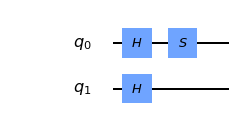

In [17]:
#Circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.s(0)
qc.draw()
#None of the above

In [19]:
s_results = execute(qc, backend=s_simulator).result()
print(s_results)

Result(backend_name='statevector_simulator', backend_version='0.4.1', date=datetime.datetime(2020, 3, 18, 10, 27, 59, 8968), header=Obj(backend_name='statevector_simulator', backend_version='0.4.1'), job_id='aa215190-6dc3-4651-820f-6ae84cdd128f', metadata={'max_memory_mb': 16081, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.000174892}, qobj_id='4991e1b0-4823-4f80-b075-b0d2bf7f75f6', results=[ExperimentResult(data=ExperimentResultData(statevector=array([ 0.5+0.j , -0. +0.5j,  0.5+0.j ,  0. +0.5j])), header=Obj(clbit_labels=[], creg_sizes=[], memory_slots=0, n_qubits=2, name='circuit12', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), meas_level=<MeasLevel.CLASSIFIED: 2>, metadata={'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=550292633, shots=1, status='DONE', success=True, time_taken=8.839400000000001e-05)], status='COMPLETED', success=True, time_taken=0.0052335262298583984)


# 6. How to implement the following $R_{zz}$ phase shift gate in qiskit:
$$\begin{pmatrix}e^{i\phi} && 0 \\ 0 && e^{i\phi}\end{pmatrix} = e^{i\phi}I$$

## Answer 6

We can implement using $X$ and $U_1$ gates in the following way, <br>
$$
R_{zz}(\phi) = U_1(\phi)XU_1(\phi)X \\
= \begin{pmatrix}1 && 0 \\ 0 && e^{i\phi}\end{pmatrix}\begin{pmatrix}0 && 1 \\ 1 && 0\end{pmatrix}\begin{pmatrix}1 && 0 \\ 0 && e^{i\phi}\end{pmatrix}\begin{pmatrix}0 && 1 \\ 1 && 0\end{pmatrix} \\
= \begin{pmatrix} 0 && 1 \\ e^{i\phi} && 0 \end{pmatrix}\begin{pmatrix} 0 && 1 \\ e^{i\phi} && 0\end{pmatrix} \\
= \begin{pmatrix} e^{i\phi} && 0 \\ 0 && e^{i\phi} \end{pmatrix}
$$

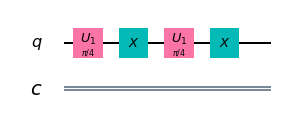

In [4]:
phi = math.pi/4
qc = QuantumCircuit(1,1)
qc.u1(phi,0)
qc.x(0)
qc.u1(phi,0)
qc.x(0)
qc.draw('mpl')

In [9]:
results = execute(qc, backend=s_simulator).result()
state_vector = results.get_statevector()
print(state_vector)

[0.70710678+0.70710678j 0.        +0.j        ]


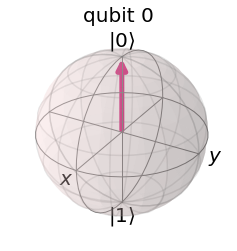

In [10]:
plot_bloch_multivector(state_vector)

# 7. How do you test whether two states $|\psi>$ and $|\phi>$ are equal?

Say two states are <br>
$$
\vert \psi \rangle = \alpha_1 \vert 0 \rangle + \beta_1 \vert 1 \rangle \\
\vert \phi \rangle = \alpha_2 \vert 0 \rangle + \beta_2 \vert 1 \rangle
$$

How do we verify, using Qiskit, whether these states are equal or not?

## Answer 7.

We check for state equality with the <b>SWAP test</b> described as follows,<br>
1. Encode the quantum states $\vert \psi \rangle$ and $\vert \phi \rangle$ using quantum error correction codes - such a code will increase the difference between the two
2. Test using an ancilla register using the circuit described below 
3. Read the ancilla register - if it is |0⟩ then the 2 states are probably equal. 

In [ ]:
 When do you want to use Qiskit Pulse?
1)  
Performing better calibrations on qubits
2)  
Measuring coherence time T1 and T2
3)  
Getting optimized gate errors
4)  
Accessing higher energy states of transmon qubits
5)  
All of the above

In [ ]:
 Which kind of Pulse waveforms is used to reduce the chance of leakage to higher energy states of transmon qubits?
1)  

Constant

2)  

Drag

3)  

Gaussian

4)  

GaussianSquare

5)  
None of the above
https://qiskit.org/documentation/stubs/qiskit.pulse.Drag.html